<a href="https://colab.research.google.com/github/caseynv/Predictive-analytics-Project_1/blob/master/PA_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     \ 17.8 MB 21.3 MB/s 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 15.9 MB/s eta 0:00:00
  Created wheel for ydata-profiling: filename=ydata_profiling-0.0.dev0-py2.py3-none-any.whl size=357887 sha256=1f222c351e1a8dcdb4e44b23d7c3de1ebc07e593c6cf89d4db6432f27e93a2a0
  Stored in directory: /tmp/pip-ephem-wheel-cache-m2dkqsal/wheels/07/29/61/f533cc7cbd0a97efb2d1b94d3254a3e859a949367ba842577b
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=ad79cbda79bea236be7f568514c3f456bc0e53b01f048a1fe054a4ee448d34a6
  Stored in directory

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

<ipython-input-2-19efdb25f55a>:5: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [3]:
# Load the CSV file into a DataFrame
df_re_intro = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/RealEstateData_STAT5290_project01_Intro.csv', index_col=None, header=0)

# Display the DataFrame
print(df_re_intro)

      Id  Realtor_ID         Dwelling Type  Lot Frontage  Lot Area  \
0    220       11479           1-STORY PUD            43      3010   
1    230       11509           1-STORY PUD            43      3182   
2    386       11969           1-STORY PUD            43      3182   
3    444       12113           1-STORY PUD            53      3922   
4    466       12177           1-STORY PUD             0      3072   
..   ...         ...                   ...           ...       ...   
725  327       11801           1-STORY PUD            32     10846   
726  401       12003           1-STORY PUD            38     14963   
727  673       12772  1-STORY 1946 & NEWER             0     11250   
728  765       13039           1-STORY PUD            30      9549   
729  850       13286  SPLIT OR MULTI-LEVEL            80      9600   

    Land Contour         Neighborhood  Location Condition  Overall Quality  \
0          Level  Bloomington Heights              Normal                7   
1  

In [4]:
# Selecting specific columns from df_re_intro and creating a new DataFrame df_re
df_re = df_re_intro[['Realtor_ID', 'Dwelling Type', 'Lot Frontage', 'Lot Area', 'Land Contour',
                  'Neighborhood', 'Location Condition', 'Overall Quality', 'Overall Cond',
                  'Year Built', 'Basement Finished Area', 'Basement Unfinished Area',
                  '1st Floor Area', '2nd Floor Area', 'Bedrooms Above Grade',
                  'Total Rooms Above Grade', 'Sale Price', 'Porch Area',
                  'Full Bathrooms', 'Half Bathrooms']].copy()

# Display the new DataFrame df_re
print(df_re)

     Realtor_ID         Dwelling Type  Lot Frontage  Lot Area Land Contour  \
0         11479           1-STORY PUD            43      3010        Level   
1         11509           1-STORY PUD            43      3182        Level   
2         11969           1-STORY PUD            43      3182        Level   
3         12113           1-STORY PUD            53      3922        Level   
4         12177           1-STORY PUD             0      3072        Level   
..          ...                   ...           ...       ...          ...   
725       11801           1-STORY PUD            32     10846        Level   
726       12003           1-STORY PUD            38     14963        Level   
727       12772  1-STORY 1946 & NEWER             0     11250        Level   
728       13039           1-STORY PUD            30      9549        Level   
729       13286  SPLIT OR MULTI-LEVEL            80      9600        Level   

            Neighborhood  Location Condition  Overall Quality  

In [5]:
def highlight_min(s):
    '''
    highlight the minimum in a Series red.
    '''
    is_min = s == s.min()
    return ['background-color: yellow' if v else '' for v in is_min]


In [6]:
def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: red' if v else '' for v in is_max]

In [7]:
df_re.head(10).style.set_table_styles([{'selector': 'td',
                                          'props': [('font-family', 'courier')]}]
                                       ).apply(highlight_min).apply(highlight_max)

,Realtor_ID,Dwelling Type,Lot Frontage,Lot Area,Land Contour,Neighborhood,Location Condition,Overall Quality,Overall Cond,Year Built,Basement Finished Area,Basement Unfinished Area,1st Floor Area,2nd Floor Area,Bedrooms Above Grade,Total Rooms Above Grade,Sale Price,Porch Area,Full Bathrooms,Half Bathrooms
0,11479,1-STORY PUD,43,3010,Level,Bloomington Heights,Normal,7,5,2005,16,1232,1248,0,2,5,167240,108,2,0
1,11509,1-STORY PUD,43,3182,Level,Bloomington Heights,Normal,7,5,2005,16,1357,1555,0,2,7,192500,163,2,0
2,11969,1-STORY PUD,43,3182,Level,Bloomington Heights,Normal,8,5,2004,24,1232,1269,0,2,6,192000,310,2,0
3,12113,1-STORY PUD,53,3922,Level,Bloomington Heights,Normal,7,5,2006,0,1258,1258,0,2,6,172500,160,2,0
4,12177,1-STORY PUD,0,3072,Level,Bloomington Heights,Normal,7,5,2004,0,1375,1414,0,2,6,178740,164,2,0
5,12458,1-STORY PUD,0,3196,Level,Bloomington Heights,Normal,7,5,2003,0,1374,1557,0,2,7,234000,163,2,0
6,12564,1-STORY PUD,53,3922,Level,Bloomington Heights,Normal,7,5,2006,0,1258,1402,0,2,7,194201,136,0,4
7,12683,1-STORY PUD,53,3982,Level,Bloomington Heights,Normal,8,5,2006,1154,366,1567,0,1,7,264561,312,3,0
8,13122,1-STORY PUD,43,3182,Level,Bloomington Heights,Normal,7,5,2005,16,1129,1145,0,2,5,160200,116,2,0
9,13291,1-STORY PUD,0,3196,Level,Bloomington Heights,Normal,8,5,2003,0,1273,1456,0,2,7,215000,163,2,0


In [8]:
df_re.head(10).style.set_table_styles(
[{'selector': 'th', #text for the header
  'props': [('background', '#00FF00'),
            ('color', 'blue'),
            ('font-family', 'arial')]},

 {'selector': 'td', #text for the data
  'props': [('font-family', 'avenir'),
            ('text-align','center')]},

 {'selector': 'tr:nth-of-type(odd)', #odd number rows
  'props': [('background', '#DCDCDC')]},

 {'selector': 'tr:nth-of-type(even)', #even numbered rows
  'props': [('background', 'black'),
            ('color', '#DCDCDC')]},

 {'selector': 'tr:hover', #hover style
  'props': [('background-color', 'yellow')]}
]
).hide_index()

<ipython-input-8-a8a429847912>:21: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  ).hide_index()


Realtor_ID,Dwelling Type,Lot Frontage,Lot Area,Land Contour,Neighborhood,Location Condition,Overall Quality,Overall Cond,Year Built,Basement Finished Area,Basement Unfinished Area,1st Floor Area,2nd Floor Area,Bedrooms Above Grade,Total Rooms Above Grade,Sale Price,Porch Area,Full Bathrooms,Half Bathrooms
11479,1-STORY PUD,43,3010,Level,Bloomington Heights,Normal,7,5,2005,16,1232,1248,0,2,5,167240,108,2,0
11509,1-STORY PUD,43,3182,Level,Bloomington Heights,Normal,7,5,2005,16,1357,1555,0,2,7,192500,163,2,0
11969,1-STORY PUD,43,3182,Level,Bloomington Heights,Normal,8,5,2004,24,1232,1269,0,2,6,192000,310,2,0
12113,1-STORY PUD,53,3922,Level,Bloomington Heights,Normal,7,5,2006,0,1258,1258,0,2,6,172500,160,2,0
12177,1-STORY PUD,0,3072,Level,Bloomington Heights,Normal,7,5,2004,0,1375,1414,0,2,6,178740,164,2,0
12458,1-STORY PUD,0,3196,Level,Bloomington Heights,Normal,7,5,2003,0,1374,1557,0,2,7,234000,163,2,0
12564,1-STORY PUD,53,3922,Level,Bloomington Heights,Normal,7,5,2006,0,1258,1402,0,2,7,194201,136,0,4
12683,1-STORY PUD,53,3982,Level,Bloomington Heights,Normal,8,5,2006,1154,366,1567,0,1,7,264561,312,3,0
13122,1-STORY PUD,43,3182,Level,Bloomington Heights,Normal,7,5,2005,16,1129,1145,0,2,5,160200,116,2,0
13291,1-STORY PUD,0,3196,Level,Bloomington Heights,Normal,8,5,2003,0,1273,1456,0,2,7,215000,163,2,0


In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'data' with columns '1st Floor Area', '2nd Floor Area', 'Sale Price', 'Lot Area', and 'Bedrooms Above Grade'

# (a) Create a new column 'Total Area'
df_re['Total Area'] = df_re['1st Floor Area'] + df_re['2nd Floor Area']
df_re


,Realtor_ID,Dwelling Type,Lot Frontage,Lot Area,Land Contour,Neighborhood,Location Condition,Overall Quality,Overall Cond,Year Built,...,Basement Unfinished Area,1st Floor Area,2nd Floor Area,Bedrooms Above Grade,Total Rooms Above Grade,Sale Price,Porch Area,Full Bathrooms,Half Bathrooms,Total Area
0,11479,1-STORY PUD,43,3010,Level,Bloomington Heights,Normal,7,5,2005,...,1232,1248,0,2,5,167240,108,2,0,1248
1,11509,1-STORY PUD,43,3182,Level,Bloomington Heights,Normal,7,5,2005,...,1357,1555,0,2,7,192500,163,2,0,1555
2,11969,1-STORY PUD,43,3182,Level,Bloomington Heights,Normal,8,5,2004,...,1232,1269,0,2,6,192000,310,2,0,1269
3,12113,1-STORY PUD,53,3922,Level,Bloomington Heights,Normal,7,5,2006,...,1258,1258,0,2,6,172500,160,2,0,1258
4,12177,1-STORY PUD,0,3072,Level,Bloomington Heights,Normal,7,5,2004,...,1375,1414,0,2,6,178740,164,2,0,1414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,11801,1-STORY PUD,32,10846,Level,Veenker,Normal,8,5,1993,...,100,1719,0,1,6,324000,152,3,1,1719
726,12003,1-STORY PUD,38,14963,Level,Veenker,Normal,8,5,1996,...,474,1288,0,1,4,245500,374,2,1,1288
727,12772,1-STORY 1946 & NEWER,0,11250,Level,Veenker,Normal,6,6,1977,...,441,1208,0,3,6,165000,240,2,1,1208
728,13039,1-STORY PUD,30,9549,Level,Veenker,Normal,8,5,1995,...,0,1494,0,2,6,270000,246,2,1,1494


<ipython-input-17-1b963ab382b9>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_re['Total Area'], hist=False, kde_kws={"shade": True})
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2511: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


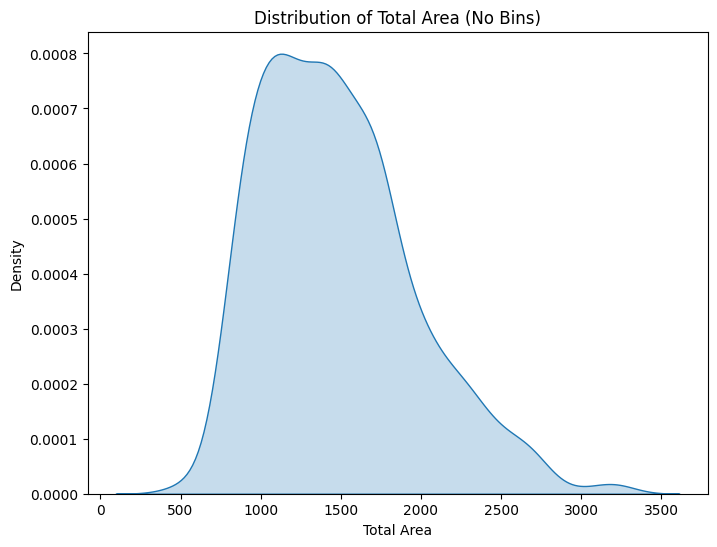

In [17]:
# (b) Create a distplot for Total Area with no bins (hist=False)
plt.figure(figsize=(8, 6))
sns.distplot(df_re['Total Area'], hist=False, kde_kws={"shade": True})
#tplot(df_re['Total Area'], hist=False, kde=True, rug=True)
plt.title('Distribution of Total Area (No Bins)')
plt.show()


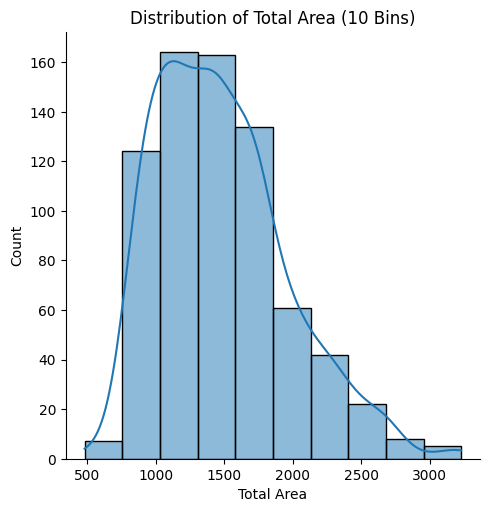

In [12]:
# (c) Create a distplot for Total Area with 10 bins
sns.displot(df_re['Total Area'], kde=True, bins=10)
plt.title('Distribution of Total Area (10 Bins)')
plt.show()



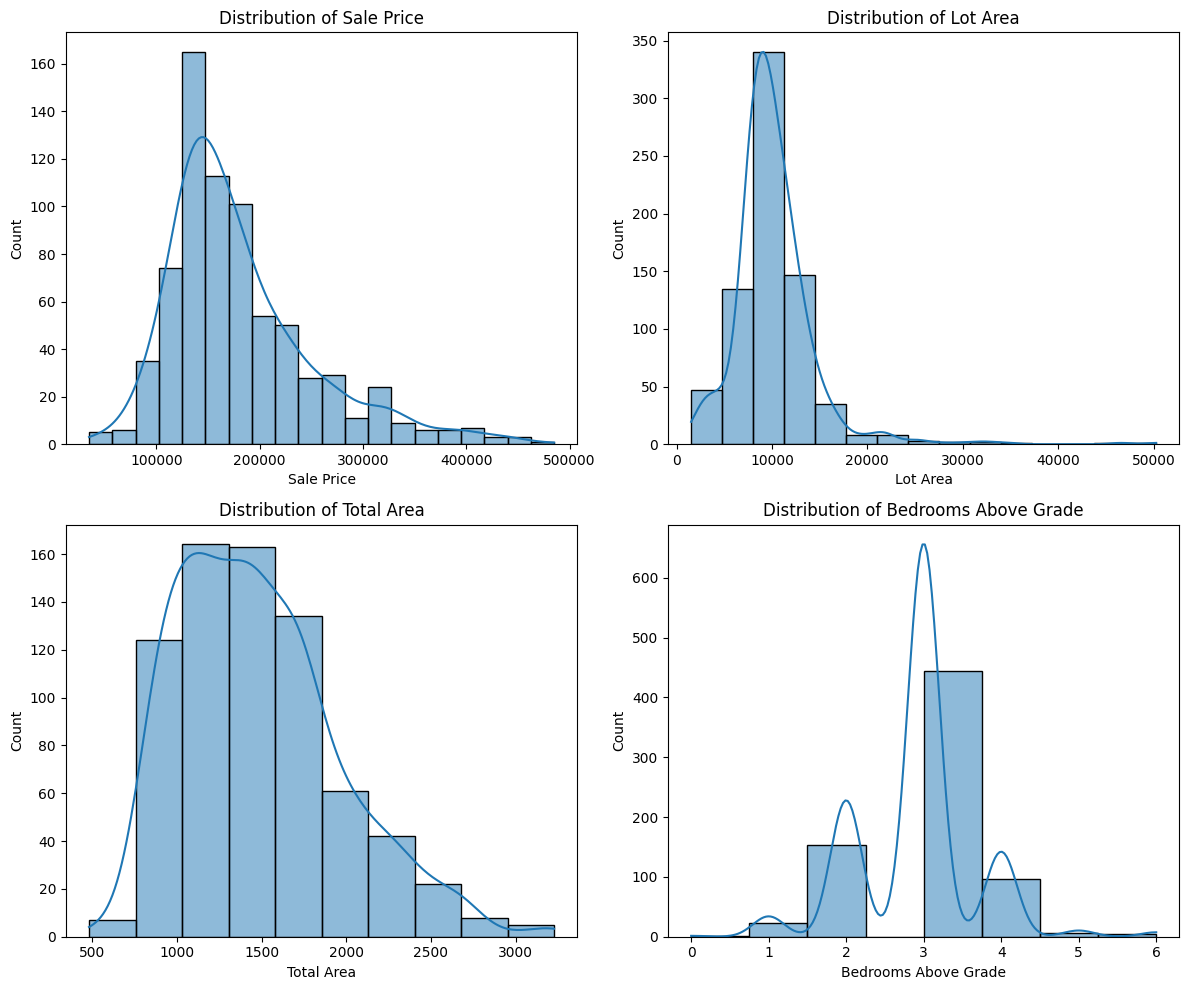

In [13]:
# (d) Create a subplot with four distplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot for Sale Price
sns.histplot(df_re['Sale Price'], kde=True, bins=20, ax=axs[0, 0])
axs[0, 0].set_title('Distribution of Sale Price')

# Plot for Lot Area
sns.histplot(df_re['Lot Area'], kde=True, bins=15, ax=axs[0, 1])
axs[0, 1].set_title('Distribution of Lot Area')

# Plot for Total Area
sns.histplot(df_re['Total Area'], kde=True, bins=10, ax=axs[1, 0])
axs[1, 0].set_title('Distribution of Total Area')

# Plot for Bedrooms Above Grade
sns.histplot(df_re['Bedrooms Above Grade'], kde=True, bins=8, ax=axs[1, 1])
axs[1, 1].set_title('Distribution of Bedrooms Above Grade')

plt.tight_layout()
plt.show()


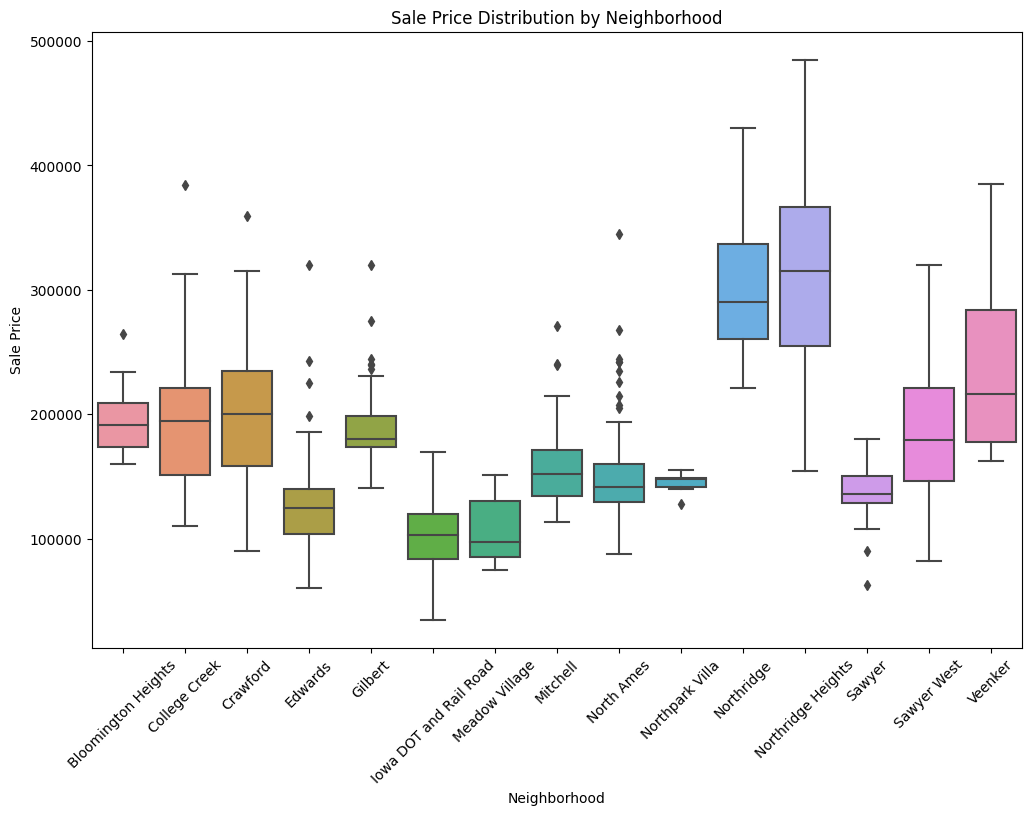

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called 'df' with columns 'Sale Price' and 'Neighborhood'

# (a) Boxplot for 'Sale Price' based on 'Neighborhood'
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_re, x='Neighborhood', y='Sale Price')
plt.title('Sale Price Distribution by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Sale Price')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()



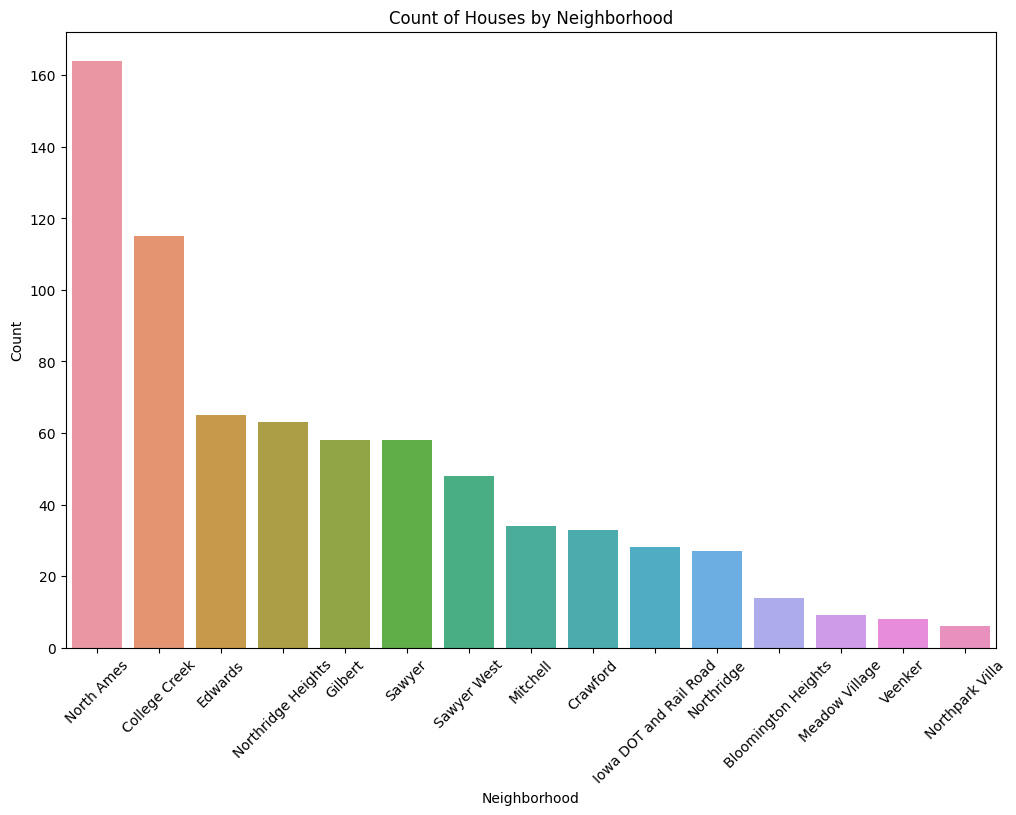

In [19]:
# (b) Countplot for 'Neighborhood'
plt.figure(figsize=(12, 8))
order = df_re['Neighborhood'].value_counts().index
sns.countplot(data=df_re, x='Neighborhood', order=order)
plt.title('Count of Houses by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


In [20]:
# (c) Create a new DataFrame named 'df_re_stats' using describe function for 'Sale Price' grouped by 'Neighborhood'
df_re_stats = df_re.groupby('Neighborhood')['Sale Price'].describe()
print(df_re_stats)

                        count           mean           std       min  \
Neighborhood                                                           
Bloomington Heights      14.0  194023.357143  29483.768428  159895.0   
College Creek           115.0  195313.382609  49193.916592  110000.0   
Crawford                 33.0  202926.484848  60755.520461   90350.0   
Edwards                  65.0  128979.230769  43116.101339   60000.0   
Gilbert                  58.0  191133.172414  31063.017536  141000.0   
Iowa DOT and Rail Road   28.0   99924.285714  34540.018889   34900.0   
Meadow Village            9.0  106533.333333  26944.526346   75000.0   
Mitchell                 34.0  160415.764706  36741.044609  113000.0   
North Ames              164.0  147376.939024  33608.568195   88000.0   
Northpark Villa           6.0  144500.000000   9391.485505  128000.0   
Northridge               27.0  302627.407407  52848.651216  221000.0   
Northridge Heights       63.0  308609.793651  78998.391682  1540

In [23]:
#(d)
df_re_stats.style.set_table_styles([{'selector': 'td',
                                          'props': [('font-family', 'courier')]}]
                                       ).apply(highlight_min).apply(highlight_max)

,count,mean,std,min,25%,50%,75%,max
Neighborhood,,,,,,,,
Bloomington Heights,14.000000,194023.357143,29483.768428,159895.000000,174060.000000,191500.000000,208667.750000,264561.000000
College Creek,115.000000,195313.382609,49193.916592,110000.000000,150950.000000,194500.000000,221250.000000,383970.000000
Crawford,33.000000,202926.484848,60755.520461,90350.000000,158500.000000,200100.000000,235000.000000,359100.000000
Edwards,65.000000,128979.230769,43116.101339,60000.000000,103600.000000,125000.000000,140000.000000,320000.000000
Gilbert,58.000000,191133.172414,31063.017536,141000.000000,174000.000000,180250.000000,198550.000000,320000.000000
Iowa DOT and Rail Road,28.000000,99924.285714,34540.018889,34900.000000,83625.000000,102888.000000,119750.000000,169500.000000
Meadow Village,9.000000,106533.333333,26944.526346,75000.000000,85000.000000,97000.000000,129900.000000,151400.000000
Mitchell,34.000000,160415.764706,36741.044609,113000.000000,134250.000000,152200.000000,171375.000000,271000.000000
North Ames,164.000000,147376.939024,33608.568195,88000.000000,129675.000000,141500.000000,159612.500000,345000.000000


In [24]:
import pandas_profiling

# Assuming 'df_re' is your DataFrame
profile = df_re.profile_report()

# Saving the report to a file
profile.to_file("df_re_profile_report.html")


/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:354: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [29]:
import pandas as pd

# (a) Import and concatenate rows for df_realestate
df_realestate_1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/RealEstateData_STAT5290_project01_Part1.csv')
df_realestate_2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/RealEstateData_STAT5290_project01_Part2.csv')

# Concatenate df_realestate_1 and df_realestate_2 into one DataFrame
df_realestate = pd.concat([df_realestate_1, df_realestate_2], ignore_index=True)

# Review df_realestate for any duplicates based on 'Realtor ID'
print("Before dropping duplicates, the shape of df_realestate:", df_realestate.shape)
print("Number of duplicates based on 'Realtor ID':", df_realestate.duplicated().sum())

# Drop duplicates from df_realestate based on all columns
df_realestate.drop_duplicates(inplace=True)
print("After dropping duplicates, the shape of df_realestate:", df_realestate.shape)


Before dropping duplicates, the shape of df_realestate: (1451, 81)
Number of duplicates based on 'Realtor ID': 0
After dropping duplicates, the shape of df_realestate: (1451, 81)


In [32]:
# (b) Import and concatenate Zoning Class column for df_realestate
df_realestate_zoning = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/RealEstateData_Zoning.csv')


# Concatenate 'Zoning Class' column from df_realestate_zoning to df_realestate
df_realestate['Zoning Class'] = df_realestate_zoning['Zoning Class']

# Check the updated df_realestate
print(df_realestate.head())

    Id  Realtor_ID         Dwelling Type  Lot Frontage  Lot Area Land Contour  \
0  1.0       10829  2-STORY 1946 & NEWER            65      8450        Level   
1  2.0       10832  1-STORY 1946 & NEWER            80      9600        Level   
2  3.0       10835  2-STORY 1946 & NEWER            68     11250        Level   
3  4.0       10839  2-STORY 1945 & OLDER            60      9550        Level   
4  5.0       10841  2-STORY 1946 & NEWER            84     14260        Level   

    Neighborhood  Location Condition  Overall Quality  Overall Cond  ...  \
0  College Creek              Normal                7             5  ...   
1        Veenker  Adjacent Feeder St                6             8  ...   
2  College Creek              Normal                7             5  ...   
3       Crawford              Normal                7             5  ...   
4     Northridge              Normal                8             5  ...   

   locc_Near Pos Feature  locc_Near Railroad  sc_Abnorma